In [ ]:

# Import basic libraries using PySpark
from pyspark import SparkConf, SparkContext

In [ ]:

# connect and establish dialouge
conf= SparkConf().setAppName("Siva First App")
sc=SparkContext.getOrCreate(conf=conf)

In [ ]:
sc.version

'3.5.3'

In [ ]:
sc.pythonVer

'3.10'

In [ ]:
sc.master

'local[*]'

In [ ]:
# Print the version of SparkContext
print("The version of Spark Context in the PySpark shell is", sc.version)

# Print the Python version of SparkContext
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

# Print the master of SparkContext
print("The master of Spark Context in the PySpark shell is", sc.master)

The version of Spark Context in the PySpark shell is 3.5.3
The Python version of Spark Context in the PySpark shell is 3.10
The master of Spark Context in the PySpark shell is local[*]


In [ ]:
# Create a Python list of numbers from 1 to 100
# numb = range(____, ____)

# # Load the list into PySpark
# spark_data = sc.____(numb)

In [ ]:
# Create a Python list of numbers from 1 to 100
numb = range(1,101)

# Load the list into PySpark
spark_data = sc.parallelize(numb)

In [ ]:
file_path='/content/sample_data/WordData.txt'
# Load a local file into PySpark shell
lines = sc.textFile(file_path)

In [ ]:
items=[1,2,3,4]
list(map(lambda x:x+2, items))

[3, 4, 5, 6]

In [ ]:
list(filter(lambda x: (x%2!=0),items))

[1, 3]

In [ ]:
my_list=[1,2,3,4]

In [ ]:
# Print my_list in the console
print("Input list is", my_list)

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are",squared_list_lambda )

Input list is [1, 2, 3, 4]
The squared numbers are [1, 4, 9, 16]


In [ ]:
my_list2=[10,21,30,45]

In [ ]:
# Print my_list2 in the console
print("Input list is:", my_list2)

# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is: [10, 21, 30, 45]
Numbers divisible by 10 are: [10, 30]


In [ ]:
rdd=sc.parallelize([1,2,3,4,5])

In [ ]:
type(rdd)

pyspark.rdd.RDD

## Section 2: PPT 2

In [ ]:
numRDD = sc.parallelize(range(10),minPartitions=6)

In [ ]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


In [ ]:
# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is /content/sample_data/WordData.txt
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [ ]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


In [ ]:
numbRDD=sc.parallelize([1,2,3,4,5])

In [ ]:
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
	print(numb)

1
8
27
64
125


In [ ]:
fileRDD=sc.parallelize(['Spark','Sachin','Spark','PSpark'])

In [ ]:
file_path='/content/sample_data/WordData.txt'


In [ ]:
fileRDD=sc.textFile('/content/sample_data/WordData.txt')

In [ ]:
fileRDD.collect()

['Apple',
 'Mic',
 'Mic',
 'Apple',
 'Laptop',
 'Apple',
 'Mic',
 'Mic',
 'Apple',
 'Laptop',
 'Chair',
 'Chair',
 'Chair',
 'Bag',
 'Mobile',
 'Book',
 'Chair',
 'Chair',
 'Chair',
 'Bag',
 'Mobile',
 'Book',
 'Apple',
 'Mic',
 'Apple',
 'Mic',
 'Mic',
 'Apple',
 'Laptop',
 'Chair',
 'Chair',
 'Chair',
 'Bag',
 'Mobile',
 'Book',
 'Mic',
 'Apple',
 'Laptop',
 'Chair',
 'Chair',
 'Apple',
 'Mic',
 'Mic',
 'Apple',
 'Laptop',
 'Chair',
 'Chair',
 'Chair',
 'Bag',
 'Mobile',
 'Book',
 'Chair',
 'Bag',
 'Mobile',
 'Book']

In [ ]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Book' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first Two lines of fileRDD
for line in fileRDD_filter.take(2):
  print(line)

The total number of lines with the keyword Spark is 5
Book
Book


In [ ]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 1 has 2 Counts
Key 3 has 10 Counts


In [ ]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


In [ ]:
# Count the unique keys
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items():
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


The volume of unstructured data (log lines, images, binary files) in existence is growing dramatically, and PySpark is an excellent framework for analyzing this type of data through RDDs. In this 3 part exercise, you will write code that calculates the most common words from Complete Works of William Shakespeare.

## Click on this Link: https://www.gutenberg.org/ebooks/100

In [ ]:
# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())


Total number of words in splitRDD: 55


In [ ]:
stop_words= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']

In [ ]:
# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)


In [ ]:
# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
	print(word)

# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
	print("{},{}". format(word[1], word[0]))

('Apple', 10)
('Chair', 15)
('Bag', 5)
('Mobile', 5)
('Book', 5)
('Mic', 10)
('Laptop', 5)
Chair,15
Apple,10
Mic,10
Bag,5
Mobile,5
Book,5
Laptop,5


## Section 3: PPT 3

Similar to RDDs, DataFrames are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrames is easier than in RDDs. So, understanding of how to convert an RDD to a DataFrame is necessary.

In [ ]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("example").getOrCreate()

In [ ]:
sample_list=[('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)]

In [ ]:
# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema =['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
file_path='/content/sample_data/circuits.csv'

In [ ]:
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Inspecting data in PySpark DataFrame
Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc.

In [ ]:
# Print the first 10 observations
people_df.show(10)

# Count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and print their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

In [ ]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'location', 'country')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+--------------------+------------+---------+
|                name|    location|  country|
+--------------------+------------+---------+
|Albert Park Grand...|   Melbourne|Australia|
|Sepang Internatio...|Kuala Lumpur| Malaysia|
|Bahrain Internati...|      Sakhir|  Bahrain|
|Circuit de Barcel...|    Montmeló|    Spain|
|       Istanbul Park|    Istanbul|   Turkey|
|   Circuit de Monaco| Monte-Carlo|   Monaco|
|Circuit Gilles Vi...|    Montreal|   Canada|
|Circuit de Nevers...| Magny Cours|   France|
| Silverstone Circuit| Silverstone|       UK|
|      Hockenheimring|  Hockenheim|  Germany|
+--------------------+------------+---------+
only showing top 10 rows

There were 77 rows before removing duplicates, and 77 rows after removing duplicates


In [ ]:
# Filter people_df to select females
people_df_Germany = people_df.filter(people_df.country == "Germany")

# Filter people_df to select males
people_df_UK = people_df.filter( people_df.country == "UK")

# Count the number of rows
print("There are {} rows in the people_df_people_df_Germany DataFrame and {} rows in the people_df_UK DataFrame".format(people_df_Germany.count(), people_df_UK.count()))

There are 3 rows in the people_df_people_df_Germany DataFrame and 4 rows in the people_df_UK DataFrame


In [ ]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+--------------------+
|                name|
+--------------------+
|Albert Park Grand...|
|Sepang Internatio...|
|Bahrain Internati...|
|Circuit de Barcel...|
|       Istanbul Park|
|   Circuit de Monaco|
|Circuit Gilles Vi...|
|Circuit de Nevers...|
| Silverstone Circuit|
|      Hockenheimring|
+--------------------+
only showing top 10 rows



In [ ]:
# Construct a query to select all columns of the people from the temporary table "people"
query = '''SELECT * FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

In [ ]:
# Filter the people table to country == "Germany"
people_Germany = spark.sql('SELECT * FROM people WHERE country == "Germany"')

# Filter the people table DataFrame to country == "UK"
people_UK = spark.sql('SELECT * from people where country == "UK"')

# Count the number of rows in both people_df_female and people_male_df DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_Germany.count(), people_UK.count()))

There are 3 rows in the people_female_df and 4 rows in the people_male_df DataFrames


## PySpark DataFrame visualization
Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of names_df DataFrame that you have created earlier, then convert the names_df to Pandas DataFrame, and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

In [ ]:
# Create a new DataFrame with the first 10 rows
first_10_df = people_df.limit(10)

# Display the new DataFrame
first_10_df.show()


+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5106|  7|http://en.wikiped...|
|        4|     catalunya|Circuit de Barcel...|    Montmeló|    Spain|   41.57| 2.26111|109|http://en.wikiped...|
|        5|      istanbul|       Istanbul Park|    Istanbul|   Turkey| 40.9517|  29.405|130|http://en.wikiped...|
|        6|        monaco|   Circuit de Monaco| Monte-Carlo|   Monaco| 43.7347| 7.42056|

The column names of names_df are ['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']


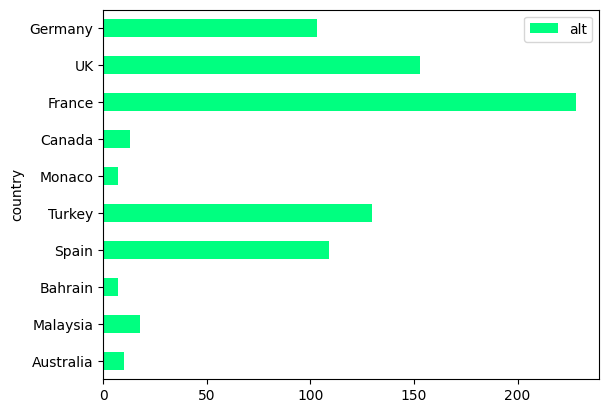

In [ ]:
import matplotlib.pyplot as plt
# Check the column names of names_df
print("The column names of names_df are", first_10_df.columns)

# Convert to Pandas DataFrame
df_pandas = first_10_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='country', y='alt', colormap='winter_r')
plt.show()


In [ ]:
# Load the Dataframe
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- circuitId: integer (nullable = true)
 |-- circuitRef: string (nullable = true)
 |-- name: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- alt: integer (nullable = true)
 |-- url: string (nullable = true)

+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|circuitId|    circuitRef|                name|    location|  country|     lat|     lng|alt|                 url|
+---------+--------------+--------------------+------------+---------+--------+--------+---+--------------------+
|        1|   albert_park|Albert Park Grand...|   Melbourne|Australia|-37.8497| 144.968| 10|http://en.wikiped...|
|        2|        sepang|Sepang Internatio...|Kuala Lumpur| Malaysia| 2.76083| 101.738| 18|http://en.wikiped...|
|        3|       bahrain|Bahrain Internati...|      Sakhir|  Bahrain| 26.0325| 50.5

In [ ]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT * FROM fifa_df_table WHERE country == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+------------------+-----------+-----------+--------+-------+------------------+-----------------+------------------+--------------------+
|summary|         circuitId| circuitRef|       name|location|country|               lat|              lng|               alt|                 url|
+-------+------------------+-----------+-----------+--------+-------+------------------+-----------------+------------------+--------------------+
|  count|                 3|          3|          3|       3|      3|                 3|                3|                 3|                   3|
|   mean|30.333333333333332|       NULL|       NULL|    NULL|   NULL|50.714666666666666|9.588243333333333|244.66666666666666|                NULL|
| stddev| 27.02468007827906|       NULL|       NULL|    NULL|   NULL| 1.610219119664569|3.273955645795058|289.75564417856185|                NULL|
|    min|                10|       avus|       AVUS|  Berlin|Germany|           49.3278|           6.9475|            

In [ ]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT lat FROM fifa_df_table WHERE country == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+------------------+
|summary|               lat|
+-------+------------------+
|  count|                 3|
|   mean|50.714666666666666|
| stddev| 1.610219119664569|
|    min|           49.3278|
|    max|           52.4806|
+-------+------------------+



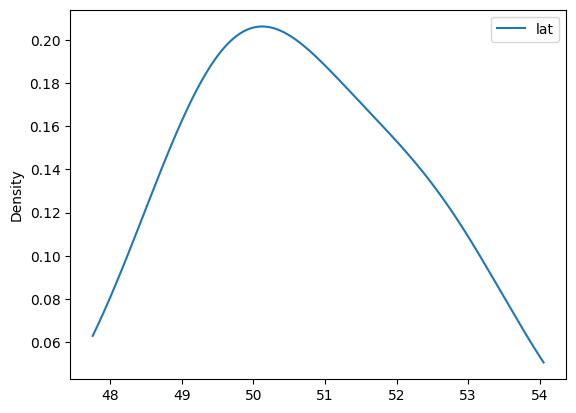

In [ ]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## Section 4: PPT 4

## Dataset: https://grouplens.org/datasets/movielens/100k/

In [14]:
file_path='/content/sample_data/ratings_.csv'

## Loading Movie Lens dataset into RDDs
Collaborative filtering is a technique for recommender systems wherein users' ratings and interactions with various products are used to recommend new ones. With the advent of Machine Learning and parallelized processing of data, recommender systems have become widely popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags. In this 3-part exercise, your goal is to develop a simple movie recommendation system using PySpark MLlib using a subset of MovieLens 100k dataset.

In the first part, you'll first load the MovieLens data (ratings.csv) into RDD and from each line in the RDD which is formatted as userId,movieId,rating,timestamp, you'll need to map the MovieLens data to a Ratings object (userID, productID, rating) after removing timestamp column and finally you'll split the RDD into training and test RDDs.

In [9]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS, Rating

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

In [11]:
# from pyspark import SparkContext, SparkConf

# # Set up Spark configuration and context
# conf = SparkConf().setAppName("AppName").setMaster("local")  # Specify app name and master
# sc = SparkContext(conf=conf)

In [15]:
# Load the data into RDD
data = sc.textFile(file_path)

# Split the RDD
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

In [16]:
from pyspark.mllib.recommendation import ALS
# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model
predictions = model.predictAll(testdata_no_rating)

# Return the first 2 rows of the RDD
predictions.take(2)


[]

In [17]:
# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))


Mean Squared Error of the model for the test data = 0.00


## Loading spam and non-spam data
Logistic Regression is a popular method to predict a categorical response. Probably one of the most common applications of the logistic regression is the message or email spam classification. In this 3-part exercise, you'll create an email spam classifier with logistic regression using Spark MLlib. Here are the brief steps for creating a spam classifier.

Create an RDD of strings representing email.
Run MLlib’s feature extraction algorithms to convert text into an RDD of vectors.
Call a classification algorithm on the RDD of vectors to return a model object to classify new points.
Evaluate the model on a test dataset using one of MLlib’s evaluation functions.

In [ ]:
import pandas as pd

# Load the CSV data
data = pd.read_csv("spam.csv")

# Filter spam and ham messages
spam_messages = data[data['Type'] == 'spam']['Message']
non_spam_messages = data[data['Type'] == 'ham']['Message']

# Save spam messages to file_path_spam
with open("file_path_spam.txt", "w") as spam_file:
    for message in spam_messages:
        spam_file.write(message + "\n")

# Save non-spam messages to file_path_non_spam
with open("file_path_non_spam.txt", "w") as non_spam_file:
    for message in non_spam_messages:
        non_spam_file.write(message + "\n")


In [ ]:
# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())


In [ ]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint

# Create a HashingTF instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features: LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features: LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.union(non_spam_samples)


In [ ]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Split the data into training and testing
train_samples, test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))


In [ ]:
# Load the dataset into an RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split('\t'))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))


In [ ]:
# Train the model with clusters from 13 to 16 and compute WSSSE
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k
model = KMeans.train(rdd_split_int, k=16, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters